# Import libraries 

As a data analyst, you would typically use libraries such as: 
- `pandas` : used to read data into a structured tabular format known as a `DataFrame`. It supports reading data from files, databases and APIs. It allows for operations to be performed on the `DataFrame` before then being written out to another file or database. 
- `matplotlib` : used to send create visualisations.  
- And much more..! Depending on what you need to do. 

Go ahead an import these popular libraries into your notebook by running

```python
import pandas as pd  
import matplotlib.pyplot as plt 
```

If these libraries do not exist on your computer, you would see a `Module Not Found` error. In that case, go ahead and install these libraries by running: 

```
pip install pandas 
pip install matplotlib
```


In [2]:
import pandas as pd  
import matplotlib.pyplot as plt 

# Reading in data

As a Data Analyst, you would work closely with the Data Engineer to have the data pulled in from various sources to speed up your ability to answer business questions. 

For this instructor demo, let's assume that a Data Engineer has prepared a dataset for you (as per the previous exercises we did), and the dataset is stored in `../resources/final_superstore.csv`. 

We can read in the data using: 
```python
pd.read_csv("file_path_here")
```

In [3]:
df = pd.read_csv("../resources/final_superstore.csv")
df.head()

,customer_id,customer_city,customer_state,price,freight_value,product_category_name_english,total_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,124.99,21.88,office_furniture,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,santarem,PA,112.99,24.90,office_furniture,137.89
2,8912fc0c3bbf1e2fbf35819e21706718,santarem,PA,112.99,24.90,office_furniture,137.89
3,f0ac8e5a239118859b1734e1087cbb1f,nova santa rita,RS,124.99,15.62,office_furniture,140.61
4,6bc8d08963a135220ed6c6d098831f84,mage,RJ,106.99,30.59,office_furniture,137.58


# Answer Questions 

As a Data Analyst, your role is to work closely with the business to use data to answer their questions. Using data to inform decisions is incredibly powerful to a business. Without it, decision makers are left to make decisions in the dark or using their gut-feel which can be misleading. 

The CFO of GlobalSuperStore has asked us to provide answers on the following questions: 
- What is my total sales for the top 10 State? 
- What is my average sales for the top 10 Product Categories? 

To answer those questions, we can use two types of functions in Pandas: 
- **group by functions**: used to group data based on categories. 
    - use: `df.groupby()`
- **aggregation functions**: used to perform calculations on values based on the groupings. 
    - you can use: 
        - `count()`: to count rows for each group 
        - `sum()`: to sum all values for each group 
        - `mean()`: to calculate the average for each group 
        - `min()`: to calculate the minimum for each group 
        - `max()`: to calculate the maximum for each group 

The group by and aggregation functions **must** be used together. 

### Question 1: What is my total sales the top 10 States? 

In [4]:
# calculate total sales by state 
df_sum_by_state = df.groupby(["customer_state"]).sum().reset_index()
total_sales_by_state_df = df_sum_by_state[["customer_state", "total_value"]].sort_values(["total_value"], ascending=False) # total sales for each state in descending order
total_sales_by_state_df = total_sales_by_state_df.head(10) # select top 10
total_sales_by_state_df

,customer_state,total_value
25,SP,5844112.71
18,RJ,2101458.24
10,MG,1833390.70
22,RS,874054.89
17,PR,791092.53
4,BA,603533.81
23,SC,601842.26
6,DF,349973.26
8,GO,337971.15
7,ES,322897.18


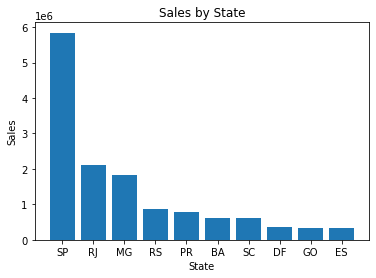

In [5]:
# visualise results in a bar chart 
plt.bar(
    x=total_sales_by_state_df["customer_state"],
    height=total_sales_by_state_df["total_value"]
) 
plt.title("Sales by State") # add chart title 
plt.xlabel("State") # add x-axis label 
plt.ylabel("Sales") # add y-axis label 
plt.savefig("sales_by_state.png") # save figure to a png file, so that it can be used in presentations 
plt.show() # dispaly the figure 

### Question 2: What is my average sales for the top 10 Product Categories? 

In [6]:
# calculate average sales by product category 
df_avg_by_category_df = df.groupby(["product_category_name_english"]).mean().reset_index()
avg_sales_by_category_df = df_avg_by_category_df[["product_category_name_english", "total_value"]].sort_values(["total_value"], ascending=False) # avg sales for each product category in descending order
avg_sales_by_category_df = avg_sales_by_category_df.rename(columns={"total_value": "avg_value"})
avg_sales_by_category_df = avg_sales_by_category_df.head(10)
avg_sales_by_category_df

,product_category_name_english,avg_value
14,computers,1146.795222
64,small_appliances_home_oven_and_coffee,660.441711
45,home_appliances_2,520.663529
0,agro_industry_and_commerce,369.689009
56,musical_instruments,309.025544
63,small_appliances,304.372356
34,fixed_telephony,243.260644
19,construction_tools_safety,229.193918
38,furniture_bedroom,226.247798
70,watches_gifts,217.917144


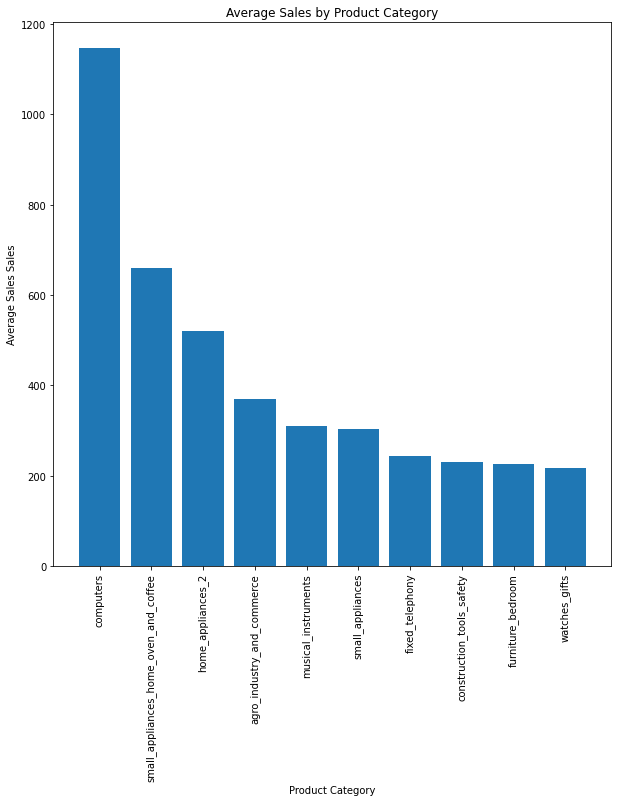

In [19]:
# visualise results in a bar chart 
plt.bar(
    x=avg_sales_by_category_df["product_category_name_english"],
    height=avg_sales_by_category_df["avg_value"]
)  
plt.title("Average Sales by Product Category") # add chart title 
plt.xlabel("Product Category") # add x-axis label
plt.xticks(rotation=90)  # rotate x-ticks 90 degrees for readability 
plt.ylabel("Average Sales Sales") # add y-axis label 
plt.savefig("avg_sales_by_category.png") # save figure to a png file, so that it can be used in presentations 
plt.show() # display the figure 